# 🔎📊 **Análisis Exploratorio de Datos**

In [ ]:
!pip install seaborn --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import drive


# Configuración visual
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
#Montar google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Carga archivo
df = pd.read_csv("/content/drive/MyDrive/IA + DataChallenge/challenge_data-18-ago.csv", sep=";")

In [ ]:
#Exploración Inicial
print("Dimensiones del dataset:", df.shape)
print("\nPrimeras filas:")
display(df.head())

print("\nTipos de datos:")
print(df.dtypes)

print("\nValores nulos por columna:")
print(df.isnull().sum())


Dimensiones del dataset: (3565, 3)

Primeras filas:


,title,abstract,group
0,Adrenoleukodystrophy: survey of 303 cases: bio...,Adrenoleukodystrophy ( ALD ) is a genetically ...,neurological|hepatorenal
1,endoscopy reveals ventricular tachycardia secrets,Research question: How does metformin affect c...,neurological
2,dementia and cholecystitis: organ interplay,Purpose: This randomized controlled study exam...,hepatorenal
3,The interpeduncular nucleus regulates nicotine...,Partial lesions were made with kainic acid in ...,neurological
4,guillain-barre syndrome pathways in leukemia,Hypothesis: statins improves stroke outcomes v...,neurological



Tipos de datos:
title       object
abstract    object
group       object
dtype: object

Valores nulos por columna:
title       0
abstract    0
group       0
dtype: int64


El dataset contiene un total de 3,566 registros, cada uno correspondiente a un artículo médico.
Las principales características del conjunto de datos son:

* Título (title): Texto breve que resume el tema principal del artículo.
* Resumen (abstract): Texto descriptivo que proporciona el contenido científico principal.
* Etiquetas de clasificación (labels o grupo): Categorías asignadas a cada artículo, que representan su área médica principal.

{
    "neurological": 1058,
    "cardiovascular": 645,
    "hepatorenal": 533,
    "neurological|cardiovascular": 308,
    "oncological": 237,
    "neurological|hepatorenal": 202,
    "cardiovascular|hepatorenal": 190,
    "neurological|oncological": 143,
    "hepatorenal|oncological": 98,
    "cardiovascular|oncological": 70,
    "neurological|cardiovascular|hepatorenal": 28,
    "neurological|hepatorenal|oncological": 26,
    "neurological|cardiovascular|oncological": 13,
    "cardiovascular|hepatorenal|oncological": 7,
    "neurological|cardiovascular|hepatorenal|oncological": 7
}


/tmp/ipython-input-865940917.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_counts.index, y=group_counts.values, palette="viridis")


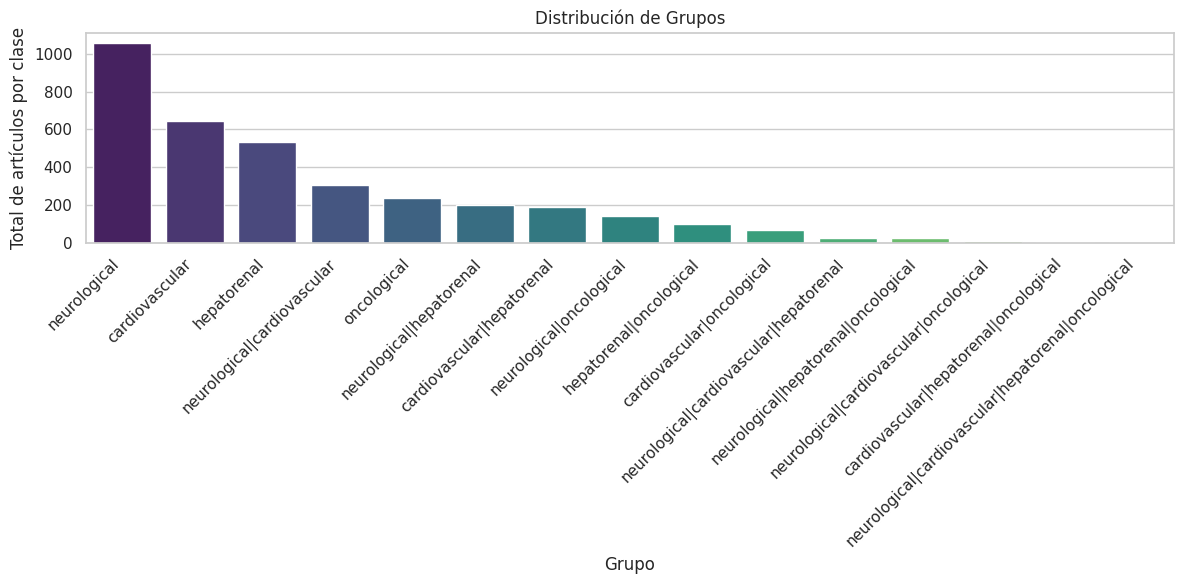

In [ ]:
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la frecuencia de cada grupo
group_counts = df['group'].value_counts()

# Convertir a diccionario y luego a JSON
group_json = group_counts.to_dict()
group_json_str = json.dumps(group_json, indent=4)

# Imprimir JSON
print(group_json_str)

# (opcional) Guardar en un archivo
with open("group_counts.json", "w") as f:
    f.write(group_json_str)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=group_counts.index, y=group_counts.values, palette="viridis")
plt.title("Distribución de Grupos")
plt.xlabel("Grupo")
plt.ylabel("Total de artículos por clase")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guardar la figura como PDF (para usar en Overleaf)
plt.savefig("group_counts.pdf", format="pdf")

# Mostrar en pantalla
plt.show()


# 🏷️📚 Clases o grupos  

1.   Cardiovascular
2.   Hepatorenal
3.   Neurological
4.   Oncological

Además el dataset es un problema de clasificación multilabel, es decir, un artículo puede pertenecer a más de una clase simultáneamente.

**Ejemplos de etiquetas combinadas:**

1. "neurological|cardiovascular"
2. "hepatorenal|oncological"
3. "neurological|cardiovascular|hepatorenal"

# 📊🏷️ Distribución de clases

* La clase "neurological" es la más frecuente, seguida de "cardiovascular" y "hepatorenal".
* La clase "oncological" aparece con menor frecuencia, tanto sola como combinada.
* Existen múltiples combinaciones entre clases, aunque su frecuencia disminuye a medida que aumenta el número de etiquetas por artículo.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


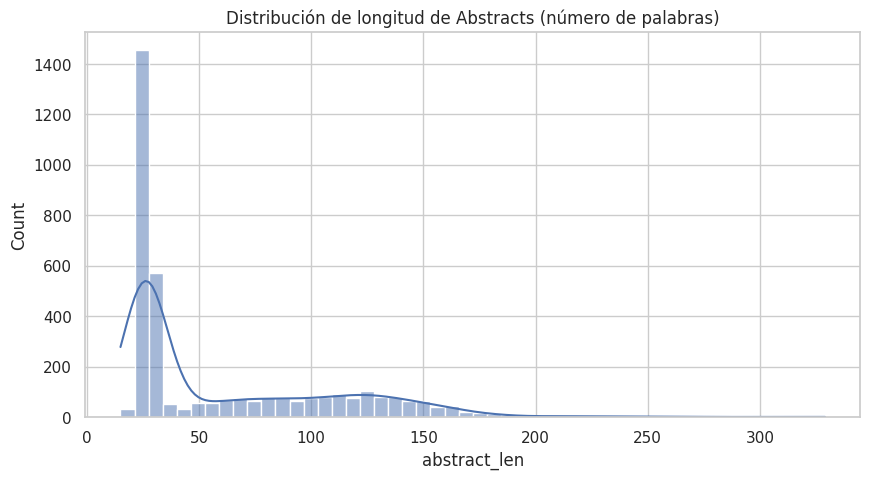

In [ ]:
# ================================
# EDA DE TEXTO PARA TITULO Y ABSTRACT
# ================================

!pip install wordcloud --quiet
!pip install nltk --quiet

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.util import ngrams
import re

nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

# ================================
# 1. Preprocesamiento básico
# ================================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)  # quitar caracteres especiales/números
    tokens = [w for w in text.split() if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

df["title_clean"] = df["title"].apply(clean_text)
df["abstract_clean"] = df["abstract"].apply(clean_text)

# ================================
# 2. Longitud de textos
# ================================
df["title_len"] = df["title_clean"].apply(lambda x: len(x.split()))
df["abstract_len"] = df["abstract_clean"].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df["abstract_len"], bins=50, kde=True)
plt.title("Distribución de longitud de Abstracts (número de palabras)")


# Guardar la figura como PDF (para usar en Overleaf)
plt.savefig("abstract_length.pdf", format="pdf")
plt.show()

**1. A partir de la imagen se observa una distribución sesgada a la derech (right-skewed)**

* La mayoría de los abstracts son relativamente cortos, concentrados entre 20 y 40 palabras.
* Existe un pico muy fuerte alrededor de los 30 palabras, lo cual parece ser la longitud más común.

**2. Cola larga hacia la derecha**
* Aunque la mayoría de abstracts son cortos, hay un número considerable que alcanza entre 100 y 200 palabras.
* Se observan algunos abstracts mucho más extensos, incluso por encima de 300 palabras, aunque son casos excepcionales.

**3. Posible multimodalidad**
* El histograma no es completamente uniforme después del pico inicial; parece haber pequeñas acumulaciones en rangos más altos (100–150 palabras). Esto podría indicar que hay dos “tipos” de abstracts en el dataset: Un grupo muy breve (probablemente resúmenes simplificados o títulos extendidos) y otro grupo más largo (resúmenes tradicionales de artículos científicos).

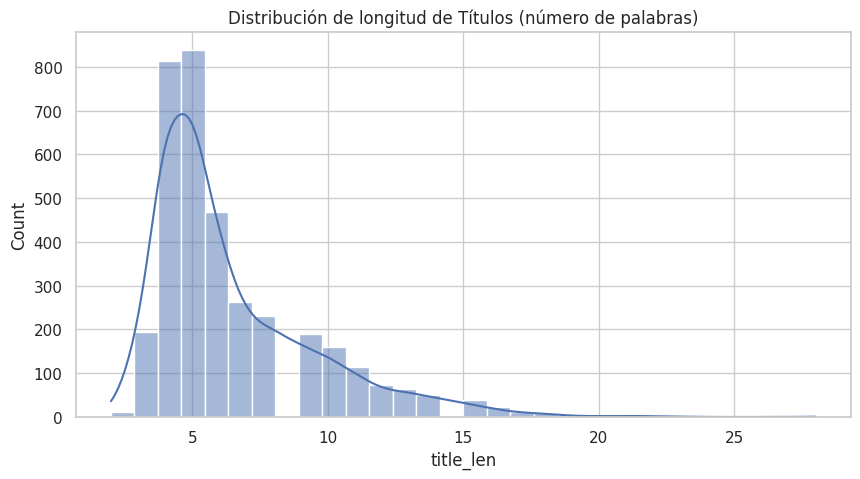

In [ ]:

plt.figure(figsize=(10,5))
sns.histplot(df["title_len"], bins=30, kde=True)
plt.title("Distribución de longitud de Títulos (número de palabras)")


# Guardar la figura como PDF (para usar en Overleaf)
plt.savefig("title_length.pdf", format="pdf")
plt.show()


**1. A partir de la imagen se observa una distribución muy concentrada**

* La mayoría de títulos tienen entre 4 y 6 palabras, lo cual es consistente con los estándares de artículos médicos (títulos breves y directos).
* El pico máximo está en los 5 palabras, con más de 800 títulos en ese rango.

**2. Distribución sesgada a la derecha**
* Aunque la mayoría son cortos, la cola se extiende hasta títulos de 20–25 palabras, lo que representa casos atípicos (probablemente títulos muy descriptivos).

**3. Se observa títulos extremadamente cortos**
* Existen algunos títulos con solo 1–2 palabras, que probablemente correspondan a abreviaturas, términos generales o entradas mal formateadas.

**4. Comparandolo con los abstracts**
* A diferencia de los abstracts, cuya longitud es muy variable (20–300 palabras), los títulos son mucho más consistentes, lo que indica menor variabilidad.
* Esto refuerza la idea de que los títulos solos no aportan suficiente información para una clasificación robusta, pero en combinación con el abstract pueden dar buenos resultados.
